In [1]:
import os
import torch
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import normalized_mutual_info_score
from tqdm import tqdm
import matplotlib.pyplot as plt

from utils import *
from cVAE_utils import *
from cVAE_trainer import *

/afs/inf.ed.ac.uk/user/s24/s2442138/miniconda3/envs/ConGele/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/afs/inf.ed.ac.uk/user/s24/s2442138/miniconda3/envs/ConGele/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/afs/inf.ed.ac.uk/user

# NoG-ALL-250000_1_1-10

In [2]:
alpha=250000
beta=1
gamma=1

In [3]:
state_dict_path = "3DcVAE_asd-UKBB604-dim32/NO_G-ALL-train_480-val_120-HP-alpha_250000-beta_1-gamma_100-batch_size_10-Exp1/model_last.pth"
state_dict = torch.load(state_dict_path)

In [4]:
train_history = state_dict["train_info_history"]
val_history = state_dict["val_info_history"]

print(state_dict.keys())
print(train_history.keys())
print(val_history.keys())

dict_keys(['model', 'optimizer', 'epoch', 'best_loss', 'bad_epochs', 'val_info_history', 'train_info_history'])
dict_keys(['reconst_loss_tg', 'reconst_loss_bg', 'reconst_loss', 'KL_s_tg', 'KL_z_tg', 'KL_z_bg', 'KL_loss', 'TC_loss', 'discriminator_loss', 'loss'])
dict_keys(['reconst_loss_tg', 'reconst_loss_bg', 'reconst_loss', 'KL_s_tg', 'KL_z_tg', 'KL_z_bg', 'KL_loss', 'TC_loss', 'discriminator_loss', 'loss', 'ss', 'ss-plot'])


## train/val loss + ss

In [20]:
loss_train = train_history["loss"]
loss_val = val_history["loss"]
ss_plot = val_history["ss-plot"]
epochs = np.arange(0, len(loss_train)) # epoch start from 1

print(len(loss_train))
print(len(loss_val))
print(len(ss_plot))
print(len(epochs))

print(loss_train[:10])
print(loss_val[:10])
print(np.array(ss_plot[50:100]).mean())
print(np.array(ss_plot[300]))
print(np.array(ss_plot[300:]).mean())
print(epochs[:10])
print()

print(np.array(ss_plot).min())
print(np.array(ss_plot).max())
print()

print(ss_plot[337])

345
345
345
345
[465473248.0, 67898.953125, 62994.40234375, 61068.53125, 59507.10546875, 58092.328125, 56696.71875, 55324.296875, 53937.3828125, 52582.8515625]
[66846.515625, 61453.98046875, 60236.09375, 59310.1640625, 59222.9140625, 55634.8203125, 52129.6953125, 52213.625, 53812.82421875, 50222.44921875]
-0.089215256
-0.019390635
-0.018499115
[0 1 2 3 4 5 6 7 8 9]

-0.096410766
-0.017454058

-0.017646784


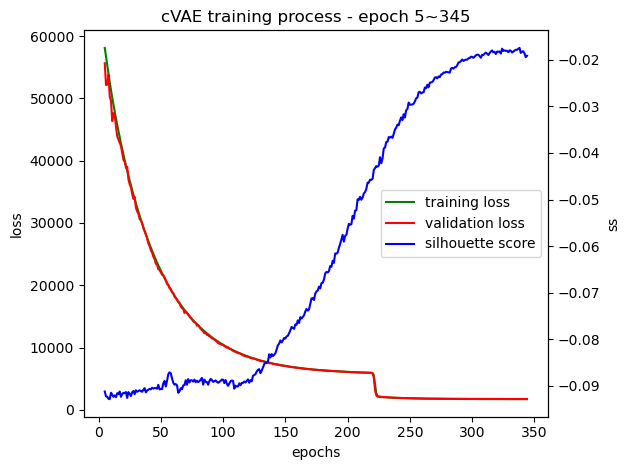

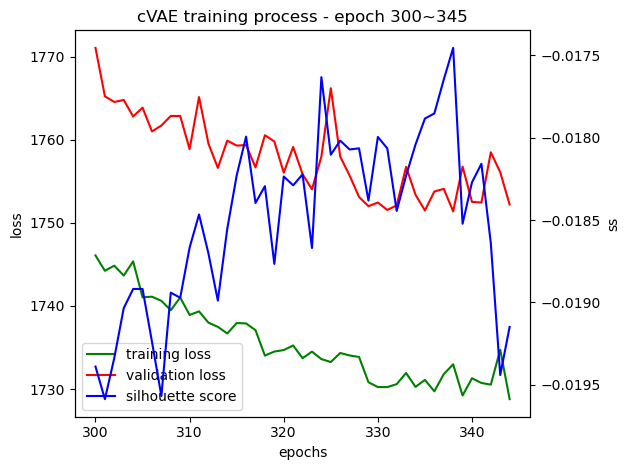

In [6]:
## ---------------------------------------------------------------
left = 5
right = len(epochs)

fig, ax1 = plt.subplots()
lns1 = ax1.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2 = ax1.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax1.set_ylabel('loss')
ax1.set_xlabel('epochs')
#ax1.legend()

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax2.set_ylabel('ss')
#ax2.legend(loc='upper left')

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=7)

plt.title(f'cVAE training process - epoch {left}~{right}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 300
right = len(epochs)

fig, ax1 = plt.subplots()
lns1 = ax1.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2 = ax1.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax1.set_ylabel('loss')
ax1.set_xlabel('epochs')
#ax1.legend()

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax2.set_ylabel('ss')
#ax2.legend(loc='upper left')

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=3)

plt.title(f'cVAE training process - epoch {left}~{right}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

fig.tight_layout()
plt.show()

## train/val

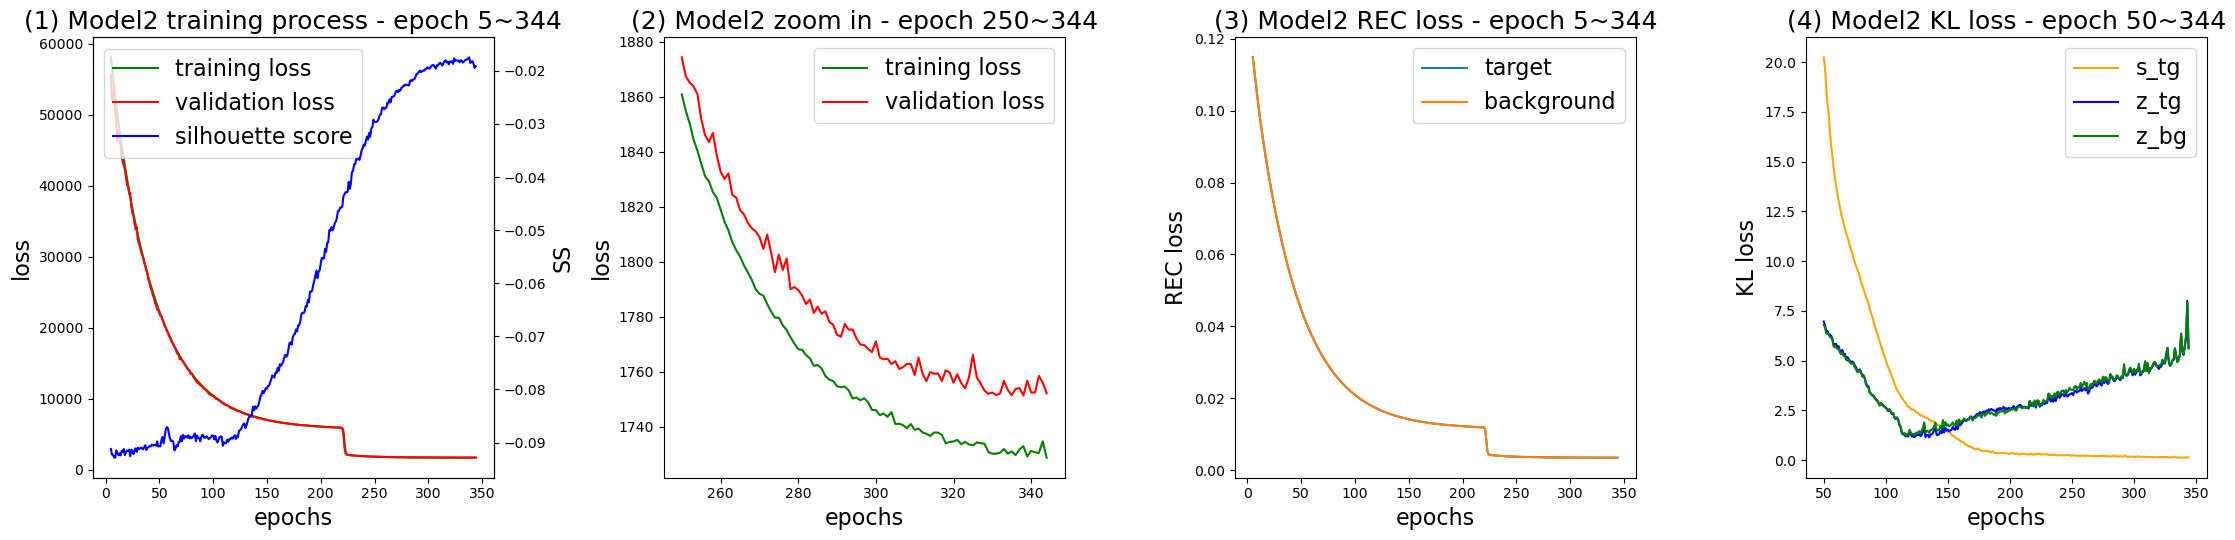

In [7]:
fig, (ax1,ax4, ax5, ax2) = plt.subplots(1,4,figsize=(22.3,5.5))
title_size = 18
label_size = 16
legend_size = 16


left = 5
right = len(epochs)
lns1=ax1.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2=ax1.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax1.set_ylabel('loss', fontsize=label_size)
ax1.set_xlabel('epochs', fontsize=label_size)
ax1.legend()
ax1.set_title(f'(1) Model2 training process - epoch {left}~{right-1}', fontsize=title_size)
ax0 = ax1.twinx()
lns3 = ax0.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax0.set_ylabel('SS', fontsize=label_size)
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center", bbox_to_anchor=(0.35, 0.85), fontsize=legend_size)

# left = 5
# right = len(epochs)
# ax2.plot(epochs[left:right], np.array(loss_train[left:right]) - np.array(loss_val[left:right]), label='trainLoss - valLoss', color='b')
# ax2.set_ylabel('loss diff')
# ax2.set_xlabel('epochs')
# ax2.legend()
# ax2.set_title(f'diff between train/val loss - epoch {left}~{right}')

# left = 100
# right = 130
# ax3.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
# ax3.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
# ax3.set_ylabel('loss')
# ax3.set_xlabel('epochs')
# ax3.legend()
# ax3.set_title(f'zoom in loss - epoch {left}~{right}')

left = 250
right = len(epochs)
ax4.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
ax4.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax4.set_ylabel('loss', fontsize=label_size)
ax4.set_xlabel('epochs', fontsize=label_size)
ax4.legend(fontsize=legend_size)
ax4.set_title(f'(2) Model2 zoom in - epoch {left}~{right-1}', fontsize=title_size)

left = 5
right = len(epochs)
ax5.plot(epochs[left:right], np.array(train_history["reconst_loss_tg"])[left:right]  / (160 * 192 * 160), label=f'target')
ax5.plot(epochs[left:right], np.array(train_history["reconst_loss_bg"])[left:right]  / (160 * 192 * 160), label=f'background')
ax5.set_title(f'(3) Model2 REC loss - epoch {left}~{right-1}', fontsize=title_size)
ax5.set_xlabel("epochs", fontsize=label_size)
ax5.set_ylabel("REC loss", fontsize=label_size)
ax5.legend(fontsize=legend_size)


left = 50
right = len(epochs)
ax2.set_title(f'(4) Model2 KL loss - epoch {left}~{right-1}', fontsize=title_size)
ax2.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f's_tg', color='orange')
ax2.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'z_tg', color='blue')
ax2.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'z_bg', color='green')
ax2.set_xlabel("epochs", fontsize=label_size)
ax2.set_ylabel("KL loss", fontsize=label_size)
ax2.legend(fontsize=legend_size)

fig.tight_layout()
plt.savefig("./analysis/Model2-loss.png")
plt.show()

In [19]:
np.array(train_history["KL_s_tg"])[0]

392329472.0

## Train loss

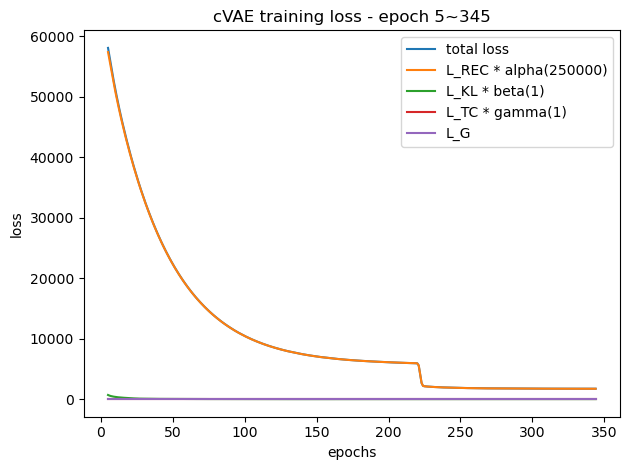

In [8]:
# alpha=1
# beta=1
# gamma=0.01

left = 5
right = len(epochs)

## 'loss'
plt.plot(epochs[left:right], train_history["loss"][left:right] , label='total loss')

## "reconst_loss", alpha=250000
## 'reconst_loss_tg', 'reconst_loss_bg'
# plt.plot(epochs[left:right], np.array(train_history["reconst_loss"])[left:right] / (160 * 192 * 160) , label='reconst_train')
plt.plot(epochs[left:right], alpha * np.array(train_history["reconst_loss"])[left:right]  / (160 * 192 * 160), label=f'L_REC * alpha({alpha})')

## "KL_loss", beta = 1
## 'KL_s_tg', 'KL_z_tg', 'KL_z_bg'
plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label='beta * KL_s_tg')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label='beta * KL_z_tg')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label='beta * KL_z_bg')

## 'TC_loss', gamma=100
# plt.plot(epochs[left:right], np.array(train_history["TC_loss"])[left:right], label='TC_train')
plt.plot(epochs[left:right], gamma * np.array(train_history["TC_loss"])[left:right], label=f'L_TC * gamma({gamma})')

## 'discriminator_loss'
plt.plot(epochs[left:right], np.array(train_history["discriminator_loss"])[left:right], label='L_G')

plt.title(f'cVAE training loss - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

plt.tight_layout()
plt.show()

## Train REC loss

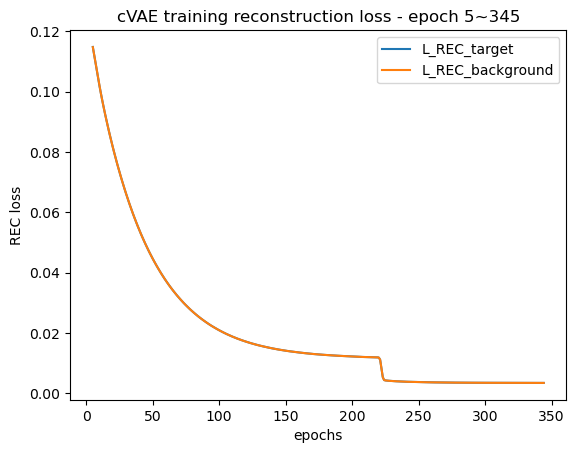

In [9]:
## "reconst_loss", alpha=1
## 'reconst_loss_tg', 'reconst_loss_bg'

## ---------------------------------------------------------------
left = 5
right = len(epochs)

#plt.plot(epochs[left:right], np.array(train_history["reconst_loss"])[left:right]  / (160 * 192 * 160), label=f'L_REC')
plt.plot(epochs[left:right], np.array(train_history["reconst_loss_tg"])[left:right]  / (160 * 192 * 160), label=f'L_REC_target')
plt.plot(epochs[left:right], np.array(train_history["reconst_loss_bg"])[left:right]  / (160 * 192 * 160), label=f'L_REC_background')

plt.title(f'cVAE training reconstruction loss - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("REC loss")
plt.legend()

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
# left = 175
# right = 200

# #plt.plot(epochs[left:right], np.array(train_history["reconst_loss"])[left:right]  / (160 * 192 * 160), label=f'L_REC')
# plt.plot(epochs[left:right], np.array(train_history["reconst_loss_tg"])[left:right]  / (160 * 192 * 160), label=f'L_REC_target')
# plt.plot(epochs[left:right], np.array(train_history["reconst_loss_bg"])[left:right]  / (160 * 192 * 160), label=f'L_REC_background')

# plt.title(f'cVAE training reconstruction loss - epoch {left}~{right}')
# plt.xlabel("epochs")
# plt.ylabel("REC loss")
# plt.legend()

# fig.tight_layout()
# plt.show()

In [10]:
print(np.array(train_history["reconst_loss_tg"])[0] /  (160 * 192 * 160))
print(np.array(train_history["reconst_loss_tg"])[-1] /  (160 * 192 * 160))
print(np.array(train_history["reconst_loss_tg"])[246] /  (160 * 192 * 160))

0.1467704137166341
0.0034350788593292235
0.003753245274225871


## Train KL loss

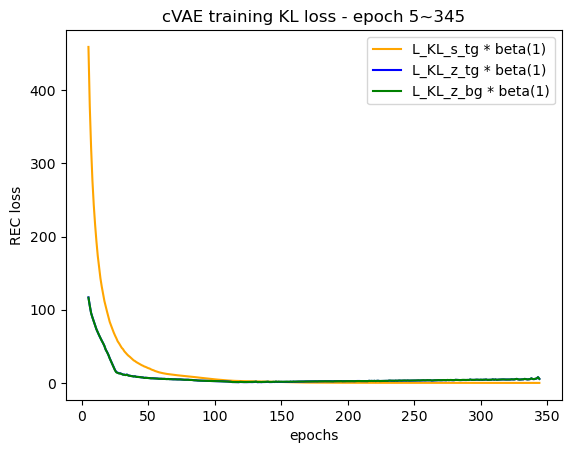

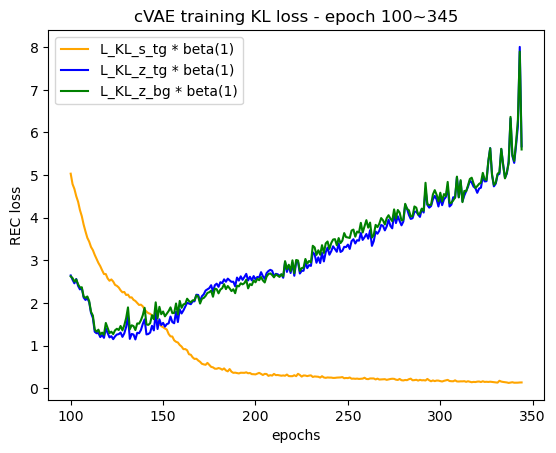

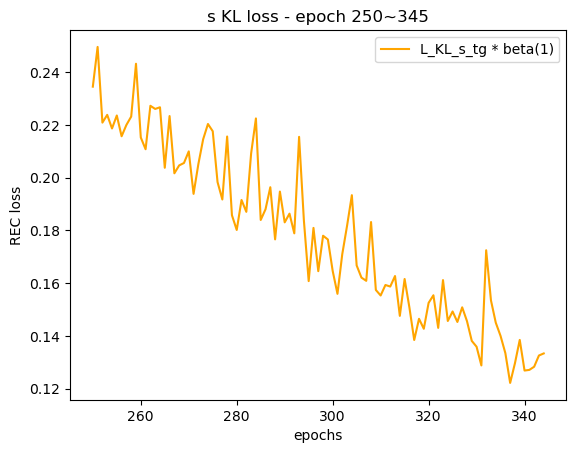

In [11]:
## "KL_loss", beta = 1
## 'KL_s_tg', 'KL_z_tg', 'KL_z_bg'

## ---------------------------------------------------------------
left = 5
right = len(epochs)

# plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')

plt.title(f'cVAE training KL loss - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("REC loss")
plt.legend()

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 100
right = len(epochs)

# plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')

plt.title(f'cVAE training KL loss - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("REC loss")
plt.legend()

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 250
right = len(epochs)

# plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')

plt.title(f's KL loss - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("REC loss")
plt.legend()

fig.tight_layout()
plt.show()

In [12]:
np.array(train_history["KL_s_tg"])[245:].max()

0.2590506970882416

In [13]:
((np.array(train_history["KL_z_tg"])+np.array(train_history["KL_z_bg"])) / 2)[245:].max()

7.954284429550171

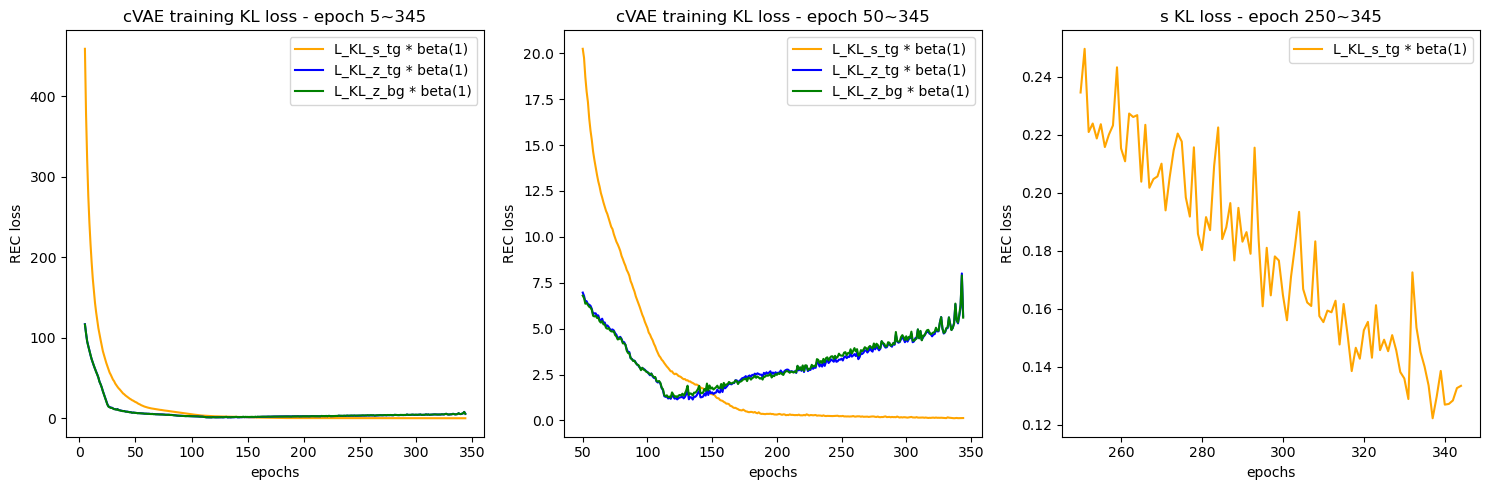

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))

left = 5
right = len(epochs)
ax1.set_title(f'cVAE training KL loss - epoch {left}~{right}')
ax1.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
ax1.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
ax1.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')
ax1.set_xlabel("epochs")
ax1.set_ylabel("REC loss")
ax1.legend()

left = 50
right = len(epochs)
ax2.set_title(f'cVAE training KL loss - epoch {left}~{right}')
ax2.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
ax2.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
ax2.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')
ax2.set_xlabel("epochs")
ax2.set_ylabel("REC loss")
ax2.legend()

left = 250
right = len(epochs)
ax3.set_title(f's KL loss - epoch {left}~{right}')
ax3.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
ax3.set_xlabel("epochs")
ax3.set_ylabel("REC loss")
ax3.legend()

fig.tight_layout()
plt.savefig("./teams/NoG-KL.png")
plt.show()

In [15]:
print(np.array(train_history["KL_s_tg"])[150:200])

[1.42926693 1.39952064 1.3755759  1.27050102 1.21506345 1.21119905
 1.1218003  1.08802128 1.07059813 1.01249588 0.97565353 0.91480339
 0.91664231 0.88883603 0.79480982 0.78360099 0.72187173 0.6847167
 0.69019783 0.64874035 0.61820567 0.57163334 0.55708867 0.54731321
 0.5921551  0.54502541 0.49889085 0.48760173 0.45678675 0.45491135
 0.47144803 0.45839471 0.4322952  0.46262777 0.41517752 0.3934651
 0.4475159  0.38553554 0.35895336 0.36336213 0.3551532  0.34488851
 0.36122879 0.36127168 0.35915923 0.37074265 0.34882838 0.35529757
 0.32850587 0.32659328]


## Train TC + G loss

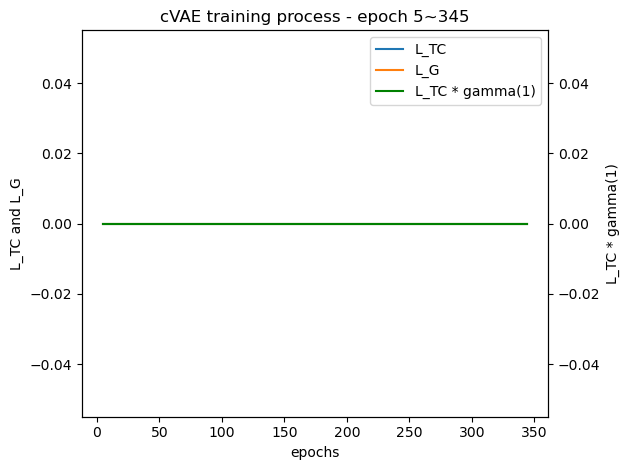

In [16]:
## 'TC_loss', gamma=1
## 'discriminator_loss'

## ---------------------------------------------------------------
left = 5
right = len(epochs)

fig, ax1 = plt.subplots()
lns1 = ax1.plot(epochs[left:right], np.array(train_history["TC_loss"])[left:right], label='L_TC')
lns2 = ax1.plot(epochs[left:right], np.array(train_history["discriminator_loss"])[left:right], label='L_G')
ax1.set_xlabel('epochs')
ax1.set_ylabel(f'L_TC and L_G')

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], gamma * np.array(train_history["TC_loss"])[left:right], label=f'L_TC * gamma({gamma})', color='g')
ax2.set_ylabel(f'L_TC * gamma({gamma})')

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)

plt.title(f'cVAE training process - epoch {left}~{right}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

fig.tight_layout()
plt.show()

In [17]:
print(train_history["discriminator_loss"][0])
print(train_history["TC_loss"][0])

0.0
0.0


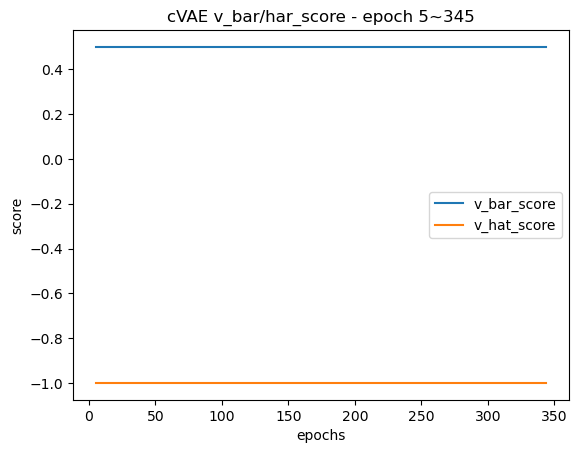

In [18]:
v_bar_score = np.exp(np.array(train_history["TC_loss"])) / (1 + np.exp(np.array(train_history["TC_loss"])))
v_hat_score = 1 - ( np.exp(-1 * np.array(train_history["discriminator_loss"])) / v_bar_score ) 

## ---------------------------------------------------------------
left = 5
right = len(epochs)

plt.plot(epochs[left:right], v_bar_score[left:right], label=f'v_bar_score')
plt.plot(epochs[left:right], v_hat_score[left:right], label=f'v_hat_score')

plt.title(f'cVAE v_bar/har_score - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("score")
plt.legend()

fig.tight_layout()
plt.show()

**cVAE just force v_har_sc